# Intégration numérique

## Intégration d'une fonction

On sait que <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mi>&pi;</mi></msubsup><msup><mi>e</mi> <mi>x</mi></msup><mi>cos</mi><mrow><mo>(</mo><mi>x</mi><mo>)</mo></mrow><mi>dx</mi><mo>=</mo><msubsup><mrow><mo>[</mo><msup><mi>e</mi> <mi>x</mi></msup><mfrac><mrow><mi>cos</mi><mrow><mo>(</mo><mi>x</mi><mo>)</mo></mrow><mo>+</mo><mi>sin</mi><mrow><mo>(</mo><mi>x</mi><mo>)</mo></mrow></mrow><mn>2</mn></mfrac><mo>]</mo></mrow> <mn>0</mn> <mi>&pi;</mi></msubsup><mo>=</mo><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mfrac><mrow><mn>1</mn><mo>+</mo><msup><mi>e</mi> <mi>&pi;</mi></msup></mrow><mn>2</mn></mfrac></math>

In [1]:
def func(x):
    return exp(x)*cos(x)
exact=-(1+exp(pi))/2

### Méthode des rectangles

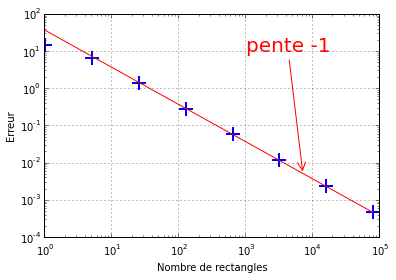

In [2]:
def integre_par_rectangles(f,a,b,N):
    """ calcule l'intégrale de f entre a et b par la méthode des rectangles
    N est le nombre de rectangles """
    dx=(b-a)/N # largeur des rectangles
    integ=0
    xi=a
    for i in range(N):
        integ+=f(xi)
        xi+=dx
    integ*=dx
    return integ
Ns=list()
erreurs_rectangles=list()
for i in range(8):
    N=5**i # nombre de rectangles
    Ns.append(N)
    erreurs_rectangles.append(abs(integre_par_rectangles(func,0,pi,N)-(-1-exp(pi))/2))
loglog(Ns,erreurs_rectangles,ls="",marker="+",ms=14,mew=2.0,color="blue")
gca().add_line(Line2D([Ns[0],Ns[-1]],[erreurs_rectangles[-1]*Ns[-1]/Ns[0],erreurs_rectangles[-1]],color="red"))
annotate("pente -1",
         xy=(sqrt(Ns[5]*Ns[6]),sqrt(erreurs_rectangles[5]*erreurs_rectangles[6])),xytext=(1e3,1e1),
         color="red",size=20,arrowprops={"arrowstyle":"->","color":"red"})
xlabel("Nombre de rectangles");ylabel("Erreur")
grid();

L'erreur est bien en <math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><mfrac><mn>1</mn><mi>N</mi></mfrac></math>

### Méthode des trapèzes

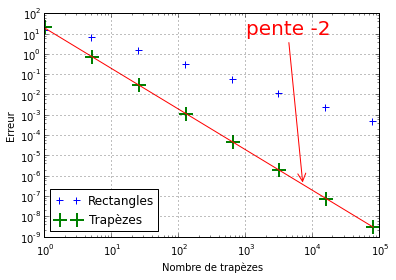

In [51]:
def integre_par_trapezes(f,a,b,N):
    """ calcule l'intégrale de f entre a et b par la méthode des trapèzes
    N est le nombre de rectangles """
    dx=(b-a)/N # largeur des trapèses
    integ=f(a)/2
    xi=a
    for i in range(1,N):
        xi+=dx
        integ+=f(xi)  
    integ+=f(b)/2
    integ*=dx
    return integ
Ns=list()
erreurs_trapezes=list()
for i in range(8):
    N=5**i # nombre de rectangles
    Ns.append(N)
    erreurs_trapezes.append(abs(integre_par_trapezes(func,0,pi,N)-(-1-exp(pi))/2))
loglog(Ns,erreurs_rectangles,ls="",marker="+",ms=7,mew=1.0,color="blue",label="Rectangles")
loglog(Ns,erreurs_trapezes,ls="",marker="+",ms=14,mew=2.0,color="green",label="Trapèzes")
gca().add_line(Line2D([Ns[0],Ns[-1]],[erreurs_trapezes[-1]*(Ns[-1]/Ns[0])**2,erreurs_trapezes[-1]],color="red"))
annotate("pente -2",
         xy=(sqrt(Ns[5]*Ns[6]),sqrt(erreurs_trapezes[5]*erreurs_trapezes[6])),xytext=(1e3,1e1),
         color="red",size=20,arrowprops={"arrowstyle":"->","color":"red"})
xlabel("Nombre de trapèzes");ylabel("Erreur")
legend(loc=3)
grid();

La convergence est meilleure, en <math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><mfrac><mn>1</mn><mrow><msup><mi>N</mi> <mn>2</mn></msup></mrow></mfrac></math>

### Intégration de Romberg

In [57]:
def integre_par_romberg(f,a,b,N):
    """ calcule 
    N est le nombre d'étapes 
    méthode non-récursive """
    R=ones((N,N))/0 # on va stocker ça dans un tableau, pour pouvoir afficher tous les coefficients
    R[0,0]=(f(a)+f(b))*(b-a)/2 # premier terme, facile
    for i in range(1,N):
        # calcul de I_i=Ri0
        dx=(b-a)/2**i
        R[i,0]=R[i-1,0]/2
        for k in range(0,2**(i-1)):
            R[i,0]+=f(a+(2*k+1)*dx)*dx
        # calcul des Rij
        for j in range(1,i+1):
            R[i,j]=R[i,j-1]+(R[i,j-1]-R[i-1,j-1])/(4**j-1)            
    return R
R=integre_par_Romberg(func,0,pi,4)
print("Triangle de Romberg")
print(R)
print("Erreurs")
print(R-exact)

Triangle de Romberg
[[-34.77851866          inf          inf          inf]
 [-17.38925933 -11.59283955          inf          inf]
 [-13.33602285 -11.98494402 -12.01108432          inf]
 [-12.38216243 -12.06420896 -12.06949329 -12.07042041]]
Erreurs
[[ -2.27081723e+01              inf              inf              inf]
 [ -5.31891301e+00   4.77506763e-01              inf              inf]
 [ -1.26567653e+00   8.54022966e-02   5.92619988e-02              inf]
 [ -3.11816113e-01   6.13735917e-03   8.53030011e-04  -7.40964789e-05]]


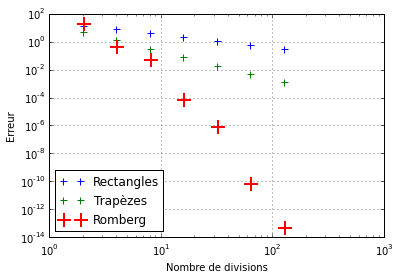

In [55]:
Ns=list()
erreurs_rectangles=list()
erreurs_trapezes=list()
erreurs_romberg=list()
for i in range(1,8):
    N=2**i # nombre de rectangles
    Ns.append(N)
    erreurs_rectangles.append(abs(integre_par_rectangles(func,0,pi,N)-(exact)))
    erreurs_trapezes.append(abs(integre_par_trapezes(func,0,pi,N)-(exact)))
    erreurs_romberg.append(abs(integre_par_romberg(func,0,pi,i)[-1,-1]-(exact)))
loglog(Ns,erreurs_rectangles,ls="",marker="+",ms=7,mew=1.0,color="blue",label="Rectangles")
loglog(Ns,erreurs_trapezes,ls="",marker="+",ms=7,mew=1.0,color="green",label="Trapèzes")
loglog(Ns,erreurs_romberg,ls="",marker="+",ms=14,mew=2.0,color="red",label="Romberg")
xlabel("Nombre de divisions");ylabel("Erreur")
legend(loc=3)
grid();


La convergence est bien supérieure à une quelconque loi de puissance

### Quadrature gaussienne

#### Quadrature à 3 points

In [71]:
def integre_par_quadrature_3points(f,a,b):
    def x(z):
        return (b+a)/2+z*(b-a)/2
    return (5/9*f(x(-sqrt(3/5)))+8/9*f(x(0))+5/9*f(x(sqrt(3/5))))*(b-a)/2
print(integre_par_quadrature_3points(func,0,pi))
print(exact)

-12.1274204502
-12.0703463164


#### Quadrature à <i>n</i> points

In [41]:
from scipy.linalg import solve
from scipy.optimize import root
def polynome_de_legendre(a,b,n):
    """
    """
    # convention: cmax=1
    mata=zeros((n,n))
    matb=zeros((n))
    for i in range(n):
        for j in range(n):
            mata[i,j]=(b**(i+j+1)-a**(i+j+1))/(i+j+1)
        matb[i]=-(b**(i+n+1)-a**(i+n+1))/(i+n+1)
    return concatenate((solve(mata,matb),[1]))
def recherche_racines(a,b,poly):
    """ Fonction ultra simpliste recherchant les racines
    fonctionne jusqu'à n=8, pas plus! """
    def eval_poly(x):
        return sum(poly*x**arange(len(poly)))
    racines=zeros((len(poly)-1))
    for i in range(len(poly)-1):
        racines[i]=root(eval_poly,a+i*(b-a)/(len(poly)-2)).x[0]
    return racines
def calcule_poids(racines):
    """
    """
    n=len(racines)
    mata=zeros((n,n))
    matb=zeros((n))
    for i in range(n):
        mata[i,:]=racines**i
        if i%2==0: # i impair
            matb[i]=2/(i+1)
    return solve(mata,matb)
def integre_par_quadrature(f,a,b,n):
    """
    """
    poly=polynome_de_legendre(-1,1,n)
    #print(poly)
    racines=recherche_racines(-1,1,poly)
    #print(racines)
    poids=calcule_poids(racines)
    #print(poids)
    vfunc=vectorize(func)
    return (b-a)/2*sum(poids*vfunc((b+a)/2+(b-a)/2*racines))
for n in range(2,9):
    erreur=integre_par_quadrature(func,0,pi,n)-exact
    print("Quadrature gaussienne à %i points: erreur=%g" % (n,erreur))

    
    

Quadrature gaussienne à 2 points: erreur=-0.265864
Quadrature gaussienne à 3 points: erreur=-0.0570741
Quadrature gaussienne à 4 points: erreur=0.000156826
Quadrature gaussienne à 5 points: erreur=1.77805e-05
Quadrature gaussienne à 6 points: erreur=-1.47123e-08
Quadrature gaussienne à 7 points: erreur=-1.14248e-09
Quadrature gaussienne à 8 points: erreur=4.03233e-13


### Comparaison entre Romberg et quadrature

In [49]:
from scipy.integrate import *

#### Calcul de l'intégrale d'une fonction discontinue

Calcul par Romberg
Romberg integration of <function vfunc at 0xaa2d96c> from [0, 3.141592653589793]

 Steps  StepSize   Results
     1  3.141593  0.934499 
     2  1.570796  1.318877  1.447003 
     4  0.785398  1.143874  1.085539  1.061442 
     8  0.392699  0.785093  0.665499  0.637496  0.630767 
    16  0.196350  0.657010  0.614316  0.610904  0.610482  0.610402 
    32  0.098175  0.816462  0.869613  0.886633  0.891009  0.892110  0.892385 
    64  0.049087  0.837879  0.845018  0.843379  0.842692  0.842503  0.842454  0.842442 
   128  0.024544  0.850038  0.854091  0.854696  0.854875  0.854923  0.854935  0.854938  0.854939 
   256  0.012272  0.855885  0.857834  0.858084  0.858138  0.858150  0.858154  0.858154  0.858155  0.858155 
   512  0.006136  0.858847  0.859834  0.859967  0.859997  0.860004  0.860006  0.860006  0.860006  0.860006  0.860007 
  1024  0.003068  0.854381  0.852892  0.852429  0.852310  0.852280  0.852272  0.852270  0.852270  0.852269  0.852269  0.852269 

The final res

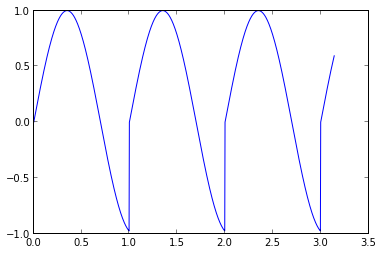

In [90]:
def f1(x):
    return sin(4.5*(x-floor(x)))
x=linspace(0,pi,1000)
plot(x,f1(x));
print("Calcul par Romberg")
print(romberg(f1,0,pi,show=True))
print("Calcul par quadrature fixe à 10 points")
print(fixed_quad(f1,0,pi,n=10))
print("Calcul par quadrature adaptative")
print(quad(f1,0,pi))

In [89]:
print("Calcul par Romberg")
print(romberg(f1,0,1,show=True)+romberg(f1,1,2)+romberg(f1,2,3)+romberg(f1,3,pi))
print("Calcul par quadrature fixe à 5 points")
print(fixed_quad(f1,0,1,n=5)[0]+fixed_quad(f1,1,2,n=5)[0]+fixed_quad(f1,2,3,n=5)[0]+fixed_quad(f1,3,pi,n=5)[0])
print("Calcul par quadrature adaptative")
print(quad(f1,0,1)[0]+quad(f1,1,2)[0]+quad(f1,2,3)[0]+quad(f1,3,pi)[0])

Calcul par Romberg
Romberg integration of <function vfunc at 0xaabed2c> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.000000 
     2  0.500000  0.389037  0.518715 
     4  0.250000  0.362262  0.353337  0.342312 
     8  0.125000  0.323029  0.309952  0.307059  0.306500 
    16  0.062500  0.297838  0.289440  0.288073  0.287772  0.287698 
    32  0.031250  0.283896  0.279249  0.278569  0.278419  0.278382  0.278373 
    64  0.015625  0.276592  0.274157  0.273818  0.273742  0.273724  0.273719  0.273718 
   128  0.007812  0.272856  0.271611  0.271442  0.271404  0.271395  0.271393  0.271392  0.271392 
   256  0.003906  0.270968  0.270339  0.270254  0.270235  0.270230  0.270229  0.270229  0.270229  0.270229 
   512  0.001953  0.270019  0.269702  0.269660  0.269650  0.269648  0.269647  0.269647  0.269647  0.269647  0.269647 
  1024  0.000977  0.269543  0.269384  0.269363  0.269358  0.269357  0.269357  0.269357  0.269356  0.269356  0.269356  0.269356 

The final result is 0.2693564

#### Intégrale d'une fonction présentant un pic localisé

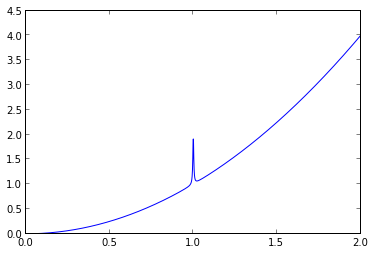

In [91]:
def f2(x):
    return x**2+1/(1+1e5*(x-1)**2)
x=linspace(0,2,1000)
plot(x,f2(x));

La formule exacte est <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mn>2</mn></msubsup><mrow><mo>(</mo><msup><mi>x</mi> <mn>2</mn></msup><mo>+</mo><mfrac><mn>1</mn><mrow><mn>1</mn><mo>+</mo><msup><mn>10</mn> <mn>5</mn></msup><msup><mrow><mo>(</mo><mi>x</mi><mo>&minus;</mo><mn>1</mn><mo>)</mo></mrow> <mn>2</mn></msup></mrow></mfrac><mo>)</mo></mrow><mi>dx</mi><mo>=</mo><mfrac><mn>8</mn><mn>3</mn></mfrac><mo>+</mo><msup><mn>2.10</mn> <mrow><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mn>2</mn><mo>,</mo><mn>5</mn></mrow></msup><mo>.</mo><mo lspace="0em" rspace="thinmathspace">atan</mo><mrow><mo>(</mo><msup><mn>10</mn> <mrow><mn>2</mn><mo>,</mo><mn>5</mn></mrow></msup><mo>)</mo></mrow></math>


In [93]:
print("Calcul par Romberg")
print(romberg(f2,0,2))
print("Calcul par quadrature fixe à 50 points")
print(fixed_quad(f2,0,2,n=50))
print("Calcul par quadrature adaptative")
print(quad(f2,0,2))
exact=8/3+2*10**(-2.5)*arctan(10**(2.5))
print("Valeur exacte")
print(exact)

Calcul par Romberg
2.67657333603
Calcul par quadrature fixe à 50 points
(2.6682198938034047, None)
Calcul par quadrature adaptative
(2.6765812549991534, 2.1121135008225545e-08)
Valeur exacte
2.676581255


#### Intégrales impropres

##### Calcul de l'intégrale <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mrow><mo lspace="verythinmathspace" rspace="0em">+</mo><mn>&infin;</mn></mrow></msubsup><mi>x</mi><mo>.</mo><msup><mi>e</mi> <mrow><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mn>2</mn><mi>x</mi></mrow></msup><mi>dx</mi><mo>=</mo><munder><mi>lim</mi> <mrow><mi>a</mi><mo>&rightarrow;</mo><mo lspace="verythinmathspace" rspace="0em">+</mo><mn>&infin;</mn></mrow></munder><msubsup><mrow><mo>[</mo><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><msup><mi>e</mi> <mrow><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mn>2</mn><mi>x</mi></mrow></msup><mrow><mo>(</mo><mfrac><mi>x</mi><mn>2</mn></mfrac><mo>+</mo><mfrac><mn>1</mn><mn>4</mn></mfrac><mo>)</mo></mrow><mo>]</mo></mrow> <mn>0</mn> <mi>a</mi></msubsup><mo>=</mo><mfrac><mn>1</mn><mn>4</mn></mfrac></math>

In [99]:
def f3(x):
    return exp(-2*x)*x
print("Calcul par Romberg: impossible")
print("Calcul par quadrature fixe: impossible")
print("Calcul par quadrature adaptative")
print(quad(f3,0,inf))

Calcul par Romberg: impossible
Calcul par quadrature fixe à 50 points: impossible
Calcul par quadrature adaptative
(0.24999999999999986, 4.600476133933031e-10)


##### Calcul de l'intégrale <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mn>1</mn></msubsup><mfrac><mrow><msup><mi>e</mi> <mi>x</mi></msup></mrow><msqrt><mi>x</mi></msqrt></mfrac><mi>dx</mi><mo>&approx;</mo><mn>2.925303491814363</mn></math>

In [106]:
def f4(x):
    return exp(x)/sqrt(x)
print("Calcul par Romberg")
print(romberg(f4,0,1))
print("Calcul par quadrature fixe à 20 points")
print(fixed_quad(f4,0,1,n=20))
print("Calcul par quadrature adaptative")
print(quad(f4,0,1))

Calcul par Romberg
nan
Calcul par quadrature fixe à 20 points
(2.8828409906933143, None)
Calcul par quadrature adaptative
(2.9253034918143674, 4.112274964995777e-10)


#### Intégration d'une fonction continue mais non C¹

Calcul de <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mrow><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mn>1</mn></mrow> <mn>1</mn></msubsup><mrow><mo>&VerticalBar;</mo><mi>x</mi><mo>&VerticalBar;</mo></mrow><mi>dx</mi><mo>=</mo><mn>1</mn></math>

In [109]:
def f5(x):
    return abs(x)
print("Calcul par Romberg")
print(romberg(f5,-1,1))
print("Calcul par quadrature fixe à 20 points")
print(fixed_quad(f5,-1,1,n=20))
print("Calcul par quadrature adaptative")
print(quad(f5,-1,1))

Calcul par Romberg
1.0
Calcul par quadrature fixe à 20 points
(1.0019613001207199, None)
Calcul par quadrature adaptative
(1.0, 1.1102230246251565e-14)


#### Conclusion: la fonction quad est vraiment géniale et sait à peu près tout faire, même des trucs bizarres

(1.0880133260462765, 0.005374430505443506)

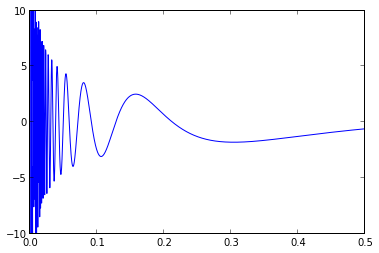

In [115]:
def f6(x):
    return cos(1/x)/sqrt(x)
x=linspace(1e-16,pi,10000)
plot(x,f6(x))
ylim([-10,10])
xlim([0,0.5])
quad(f6,0,pi)

## Intégration d'un échantillon

#### On génère un échantillon de la fonction cube, régulièrement espacé

In [31]:
x=linspace(0,20,9) # on choisit 9 points soit 2**3 intervalles (pour Romberg)
y=x**3

On sait que normalement <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mn>20</mn></msubsup><msup><mi>x</mi> <mn>3</mn></msup><mi>dx</mi><mo>=</mo><mfrac><mrow><msup><mn>20</mn> <mn>4</mn></msup></mrow><mn>4</mn></mfrac><mo>=</mo><mn>40000</mn></math>

In [33]:
exact=20**4/4

In [34]:
from scipy.integrate import *

In [35]:
int1=trapz(y,x)
print("Par trapèzes: %f" % int1)
print("Erreur relative: %f%%" % (100*abs((int1-exact)/exact)))

Par trapèzes: 40625.000000
Erreur relative: 1.562500%


In [36]:
int2=romb(y,x[1]) # x[1] est ici le pas puisque x[0]=0
print("Par Romberg: %f" % int2)
print("Erreur relative: %f%%" % (100*abs((int2-exact)/exact)))

Par Romberg: 40000.000000
Erreur relative: 0.000000%


In [37]:
int3=simps(y,x) 
print("Par Simpson: %f" % int3)
print("Erreur relative: %f%%" % (100*abs((int3-exact)/exact)))

Par Simpson: 40000.000000
Erreur relative: 0.000000%


#### On reéchantillonne la fonction cube de façon irrégulière, avec 9 points

In [71]:
x=sort(random.random(9)*20) # il faut absolument trier!
print(x)
y=x**3

[  0.81491264   2.47663262   3.07666664   7.95375045  13.8408836
  14.38427163  16.94357329  17.54437097  17.54548544]


In [72]:
int1=trapz(y,x)
print("Par trapèzes: %f" % int1)
print("Erreur relative: %f%%" % (100*abs((int1-exact)/exact)))

Par trapèzes: 25261.883168
Erreur relative: 36.845292%


In [73]:
int3=simps(y,x) 
print("Par Simpson: %f" % int3)
print("Erreur relative: %f%%" % (100*abs((int3-exact)/exact)))

Par Simpson: 23800.844626
Erreur relative: 40.497888%


In [74]:
x=sort(random.random(100)*20) # il faut absolument trier!
y=x**3

In [77]:
int1=trapz(y,x) 
print("Par trapèzes: %f" % int1)
print("Erreur relative: %f%%" % (100*abs((int1-exact)/exact)))

Par trapèzes: 36326.825035
Erreur relative: 9.182937%


In [78]:
int3=simps(y,x) 
print("Par Simpson: %f" % int3)
print("Erreur relative: %f%%" % (100*abs((int3-exact)/exact)))

Par Simpson: 36305.892908
Erreur relative: 9.235268%


#### Ça reste très mauvais: il faut éviter les échantillons irréguliers.

## Exercices

### Exercice 1: calculs d'intégrales 

Calculez numériquement par la fonction quad (l'astérisque * indique que vous êtes aussi capables de
calculer l'intégrale à la main pour comparer le résultat):

* (*)<math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mn>1</mn></msubsup><mfrac><mn>1</mn><mrow><mn>1</mn><mo>+</mo><msup><mi>x</mi> <mn>2</mn></msup></mrow></mfrac><mi>dx</mi></math>

* (*)<math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><msubsup><mo>&Integral;</mo> <mn>1</mn> <mn>&infin;</mn></msubsup><mfrac><mrow><mi>ln</mi><mi>x</mi></mrow><mrow><msup><mi>x</mi> <mn>2</mn></msup></mrow></mfrac><mi>dx</mi></math> ; le calcul à la main se fait grâce à une IPP (dérivez le ln, intégrez 1/x²)

* <math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><msubsup><mo>&Integral;</mo> <mn>0</mn> <mrow><mn>2</mn><mi>&pi;</mi></mrow></msubsup><mfrac><mn>1</mn><mrow><msup><mrow><mo>(</mo><mn>1</mn><mo>+</mo><mn>0.5</mn><mi>cos</mi><mi>t</mi><mo>)</mo></mrow> <mn>2</mn></msup></mrow></mfrac><mi>dt</mi><mo>=</mo><mfrac><mrow><mn>2</mn><mi>&pi;</mi></mrow><mrow><msup><mrow><mo>(</mo><mn>1</mn><mo>&minus;</mo><msup><mn>0.5</mn> <mn>2</mn></msup><mo>)</mo></mrow> <mrow><mn>3</mn><mo stretchy="false">/</mo><mn>2</mn></mrow></msup></mrow></mfrac></math>

### Exercice 2: Intégrales doubles

1) À l'aide de scipy.integrate.dblquad, calculez l'aire d'un quart de cercle de rayon 1: <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mrow><mi>x</mi><mo>=</mo><mn>0</mn></mrow> <mn>1</mn></msubsup><msubsup><mo>&Integral;</mo> <mrow><mi>y</mi><mo>=</mo><mn>0</mn></mrow> <msqrt><mrow><mn>1</mn><mo>&minus;</mo><msup><mi>x</mi> <mn>2</mn></msup></mrow></msqrt></msubsup><mi>dx</mi><mi>dy</mi></math>

2) Calculez de même <math xmlns='http://www.w3.org/1998/Math/MathML' display='block'><msubsup><mo>&Integral;</mo> <mrow><mi>x</mi><mo>=</mo><mn>0</mn></mrow> <mn>1</mn></msubsup><msubsup><mo>&Integral;</mo> <mrow><mi>y</mi><mo>=</mo><mn>0</mn></mrow> <mn>2</mn></msubsup><msup><mi>e</mi> <mrow><mo lspace="verythinmathspace" rspace="0em">&minus;</mo><mi>x</mi><mo>.</mo><mi>y</mi></mrow></msup><mi>dx</mi><mi>dy</mi></math>

In [3]:
from scipy.integrate import *

### Exercice 3: Calculs de primitives

1) Soit <math xmlns='http://www.w3.org/1998/Math/MathML' display='inline'><mi>f</mi><mo>:</mo><mi>x</mi><mo>&map;</mo><mi>cos</mi><mi>x</mi><mrow><mo>(</mo><mn>1</mn><mo>+</mo><mi>ln</mi><mi>x</mi><mo>)</mo></mrow></math>. Tracez sur un même graphique la fonction <i>f</i> (entre 1 et 20) et sa primitive <i>F</i> s'annulant en x=1.

<i>Conseil:</i> définissez la fonction <i>F</i> par une intégrale. Diminuez la précision de l'intégrale, il est inutile d'avoir 8 chiffres après la virgule ici.

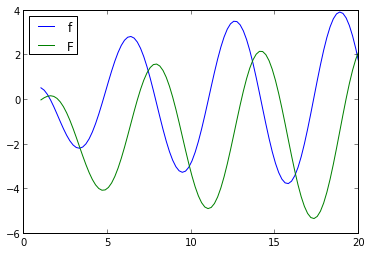

In [14]:
def f(x):
    return cos(x)*(1+log(x))
def F(x):
    return quad(f,1,x,epsrel=1e-3)[0]
x=linspace(1,20,100)
plot(x,f(x),label="f")
plot(x,(vectorize(F))(x),label="F")
legend(loc=2);

2) Soit l'échantillon de valeurs suivant:

In [24]:
datax=linspace(0,10,21)
datay=1/(1+datax**2)

À l'aide de scipy.integrate.cumtrapz, générez le tableau dataY correspondant à la primitive de datay s'annulant en 0, puis tracez 
datay et dataY

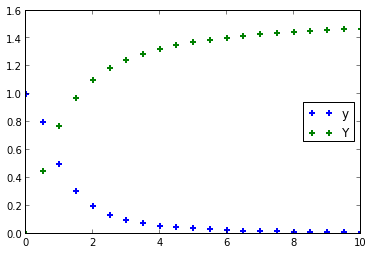

In [27]:
dataY=cumtrapz(datay,datax,initial=0)
plot(datax,datay,label="y",ls="",marker="+",mew=2)
plot(datax,dataY,label="Y",ls="",marker="+",mew=2)
legend(loc=5);